In [4]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split


In [5]:
#loading data
traindata=pd.read_csv("C:\\Users\\hp\\Downloads\\train_v9rqX0R.csv")
traindata.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#creating dataframe
df = pd.DataFrame(traindata)

In [7]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
#identifying null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#avoiding null values
df.replace(np.nan,'0',inplace = True)
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
#identifying datatype
df.dtypes

Item_Identifier               object
Item_Weight                   object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


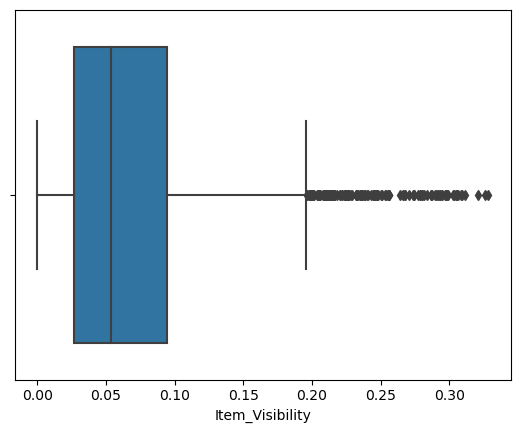

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(




(array([  49,   83,  108,  174,  334,  434,  502,  521,  532,  680,  847,
        854,  966, 1159, 1225, 1272, 1291, 1311, 1324, 1434, 1496, 1501,
       1560, 1575, 1644, 1651, 1754, 1805, 1827, 1841, 1941, 2088, 2122,
       2251, 2324, 2336, 2403, 2439, 2445, 2586, 2613, 2728, 2855, 2895,
       3001, 3017, 3171, 3206, 3336, 3341, 3399, 3458, 3474, 3488, 3497,
       3540, 3750, 3767, 3811, 3884, 3993, 4006, 4175, 4192, 4219, 4350,
       4382, 4408, 4530, 4538, 4567, 4656, 4674, 4789, 4941, 4987, 5031,
       5050, 5083, 5150, 5154, 5287, 5366, 5374, 5445, 5634, 5732, 5734,
       5795, 5837, 5880, 5891, 5946, 6008, 6012, 6102, 6179, 6536, 6547,
       6576, 6622, 6670, 6674, 6786, 6833, 6903, 6926, 6953, 6966, 7005,
       7072, 7081, 7088, 7107, 7121, 7215, 7250, 7278, 7388, 7499, 7558,
       7603, 7639, 7744, 7866, 7949, 8194, 8215, 8273, 8292, 8345, 8371,
       8432, 8509], dtype=int64),)




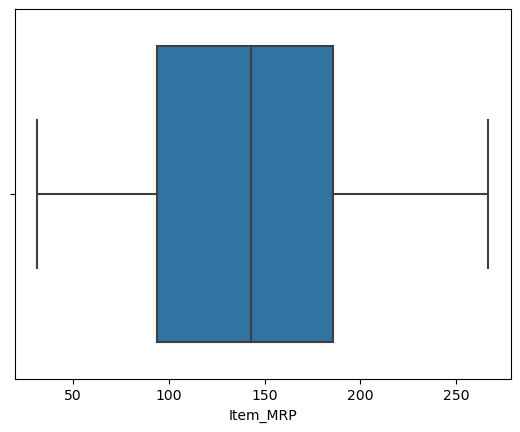

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


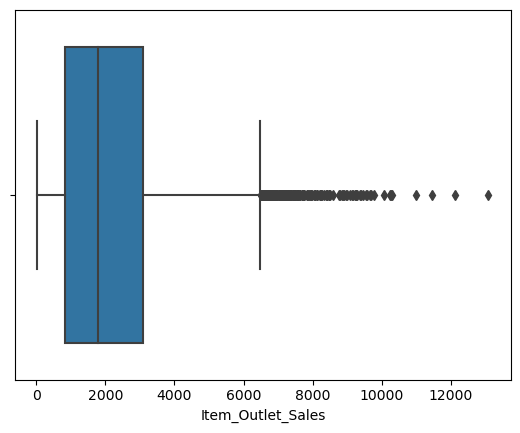



(array([  43,   55,  130,  132,  145,  146,  180,  197,  203,  240,  243,
        275,  276,  281,  304,  333,  337,  352,  373,  402,  424,  456,
        472,  497,  640,  641,  661,  694,  753,  809,  844,  903,  915,
        935,  981,  991,  997, 1009, 1012, 1040, 1043, 1044, 1067, 1092,
       1113, 1127, 1138, 1206, 1254, 1348, 1363, 1393, 1437, 1450, 1467,
       1506, 1564, 1565, 1601, 1611, 1627, 1650, 1658, 1669, 1700, 1705,
       1709, 1710, 1751, 1821, 1835, 1848, 1859, 1879, 1903, 1925, 1987,
       1996, 1998, 2019, 2040, 2107, 2109, 2216, 2238, 2282, 2293, 2437,
       2516, 2528, 2535, 2549, 2589, 2599, 2615, 2648, 2680, 2687, 2776,
       2803, 2830, 2838, 2849, 2861, 2887, 2891, 2922, 3033, 3073, 3075,
       3083, 3087, 3098, 3154, 3208, 3213, 3234, 3245, 3255, 3286, 3313,
       3321, 3400, 3404, 3407, 3494, 3498, 3584, 3590, 3636, 3667, 3670,
       3709, 3720, 3757, 3848, 3863, 3866, 3869, 3893, 3894, 3903, 3979,
       3999, 4050, 4094, 4150, 4289, 4305, 4336,

In [12]:

#identifying outliers using boxplot
sns.boxplot(df['Item_Visibility'])
plt.show()
print('\n')
print(np.where(df['Item_Visibility']>0.2))
print('\n')

sns.boxplot(df['Item_MRP'])
plt.show()
print('\n')


sns.boxplot(df['Item_Outlet_Sales'])
plt.show()
print('\n')
print(np.where(df['Item_Outlet_Sales']>6000))
print('\n')


In [13]:
#removing outliers
df1 = df[(df['Item_Visibility'] < 0.2) & (df['Item_Outlet_Sales'] < 6000)]
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,0,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [14]:
df1 = df.dropna()
df1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


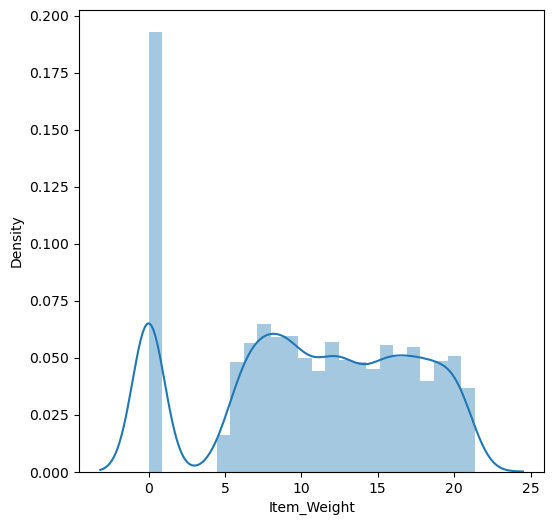

In [16]:
#eda analysis
plt.figure(figsize=(6,6))
sns.distplot(df1['Item_Weight'])
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


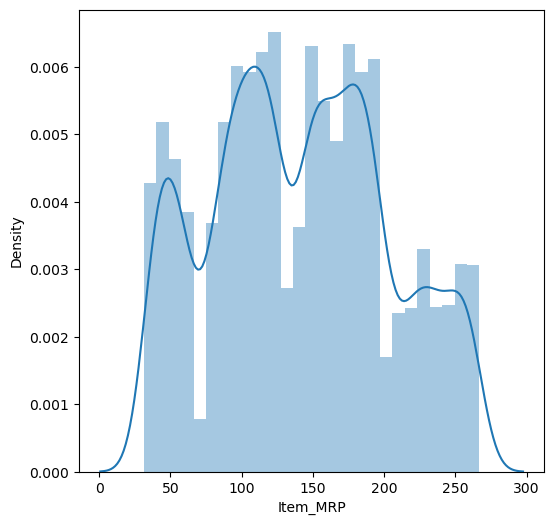

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(df1['Item_MRP'])
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


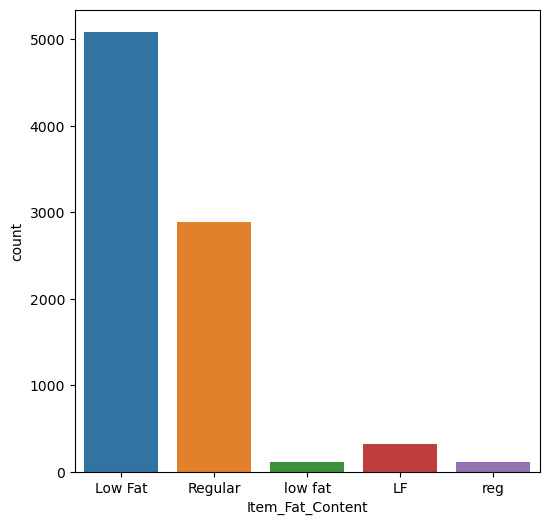

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(df1['Item_Fat_Content'])
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


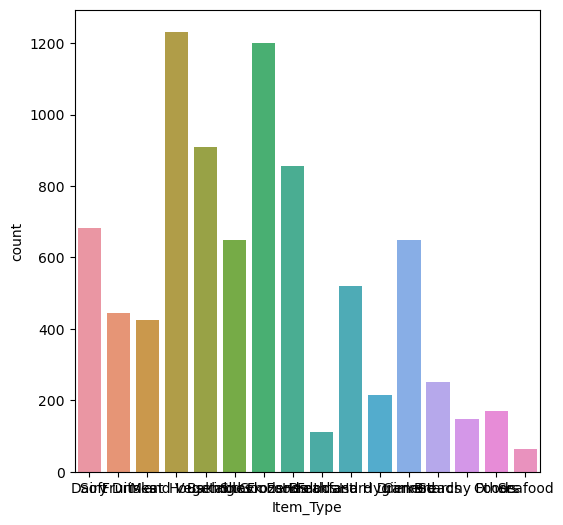

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(df1['Item_Type'])
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


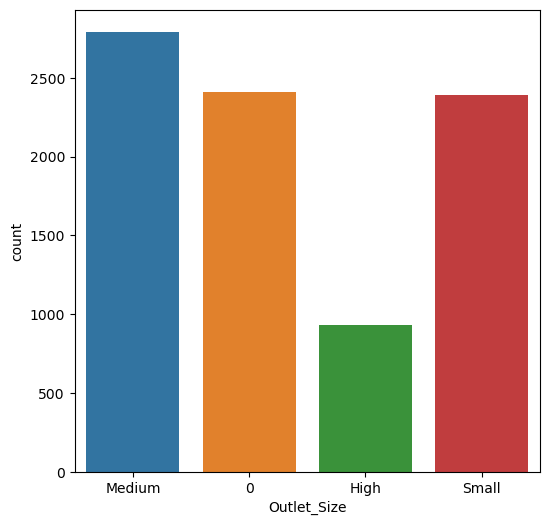

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(df1['Outlet_Size'])
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


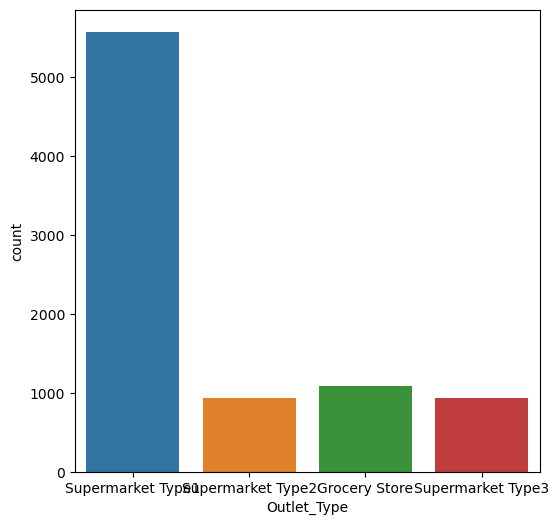

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(df1['Outlet_Type'])
plt.show()

In [22]:
#Finding mean of item weight for each group of items 
itemweight_mean = df1.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
itemweight_mean

C:\Users\hp\AppData\Local\Temp\ipykernel_7696\436243569.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  itemweight_mean = df1.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')


""
Item_Identifier
DRA12
DRA24
DRA59
DRB01
DRB13
...
NCZ30
NCZ41
NCZ42


In [23]:
#identifing the rows with null values 
miss_bool = df1['Item_Weight'].isnull()

In [24]:
#Replacing the null values in item weight column with respective mean values
for i, item in enumerate(df1['Item_Identifier']):
  if miss_bool[i]:
    if item in itemweight_mean:
      df1['Item_weight'][i] =itemweight_mean.loc[item]['Item_Weight']
    else:
      df1['Item_Weight'][i] = np.mean(df1['Item_Weight'])

In [25]:
#Finding the mode for the categorical column 'Outlet Size' based on respective outlet type
outlet_size_mode = df1.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,0,Small,Medium,Medium


In [26]:
#Replacing the null values in Outlet size column with respective mode values
miss_bool_os = df1['Outlet_Size'].isnull()
df1.loc[miss_bool_os, 'Outlet_Size'] = df1.loc[miss_bool_os,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [27]:
#Checking for null values again
df1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
#Replacing the repeated values 
df1.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

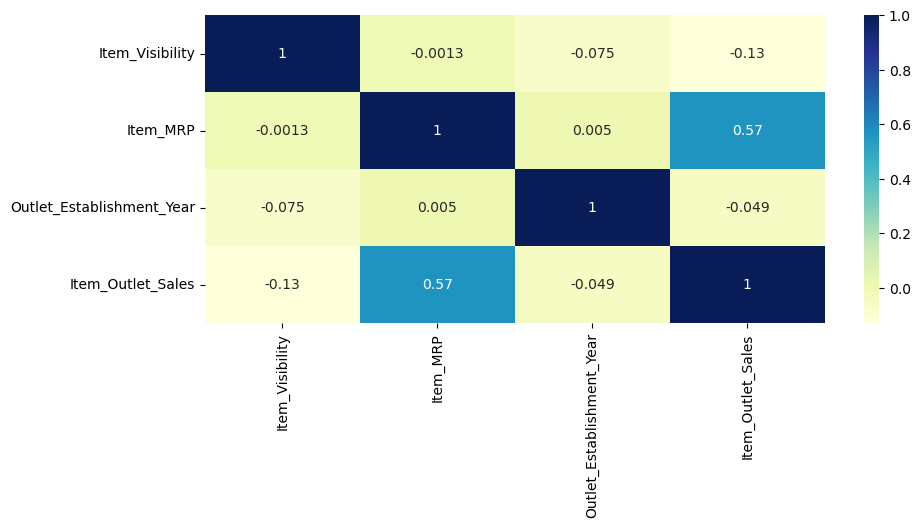

In [29]:
#Finding the correlation between feature variables and target variable
corrmatrix = df1.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

In [30]:
#OneHotEncoding of categorical columns
df2 = pd.get_dummies(df1, columns = ['Item_Fat_Content','Item_Type','Outlet_Size', 'Outlet_Location_Type','Outlet_Type'])
df2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.3,0.016047,249.8092,OUT049,1999,3735.1380,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.5,0.016760,141.6180,OUT049,1999,2097.2700,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.2,0.000000,182.0950,OUT010,1998,732.3800,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [31]:
#loading test dataset
data_test = pd.read_csv("C:\\Users\\hp\\Downloads\\test_AbJTz2l.csv")
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [32]:
#preprocessing the data
data_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [33]:
#Finding mean of item weight for each group of items 
itemweight_mean_test = data_test.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
itemweight_mean_test

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [34]:
#identifing the rows with null values 
miss_bool = data_test['Item_Weight'].isnull()

In [35]:
#Replacing the null values in item weight column with respective mean values
for i, item in enumerate(data_test['Item_Identifier']):
  if miss_bool[i]:
    if item in itemweight_mean_test:
      data_test['Item_weight'][i] =itemweight_mean_test.loc[item]['Item_Weight']
    else:
      data_test['Item_Weight'][i] = np.mean(data_test['Item_Weight'])

C:\Users\hp\AppData\Local\Temp\ipykernel_7696\4004975842.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Item_Weight'][i] = np.mean(data_test['Item_Weight'])


In [36]:
#Finding the mode for the categorical column 'Outlet Size' based on respective outlet type
outlet_size_mode_test = data_test.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode_test

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [37]:
#Replacing the null values in Outlet size column with respective mode values
miss_bool_test = data_test['Outlet_Size'].isnull()
data_test.loc[miss_bool_test, 'Outlet_Size'] = data_test.loc[miss_bool_test,'Outlet_Type'].apply(lambda x: outlet_size_mode_test[x])


In [38]:
#Checking for null values again
data_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [39]:
#Replacing the repeated values 
data_test.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
data_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [40]:
#OneHotEncoding of test data
data_test1 = pd.get_dummies(data_test, columns = ['Item_Fat_Content','Item_Type','Outlet_Size', 'Outlet_Location_Type','Outlet_Type'])

In [41]:
#linear regression model fitting and training
#Splitting of test data
x = df2.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales','Outlet_Size_0'],axis = 1)
y = df2['Item_Outlet_Sales']


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [46]:
print('Mean squared is: ', mean_squared_error(y_test, predictions))
print('R squared value is ;', r2_score(y_test,predictions))

Mean squared is:  1147505.9861111075
R squared value is ; 0.5778077175296116


In [47]:
#lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [48]:
x = df2.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'],axis = 1)
y = df2['Item_Outlet_Sales']

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
m1 = lasso.fit(x_train, y_train)

In [51]:
lasso.score(x_test, y_test), lasso.score(x_train, y_train)

(0.5789356994357215, 0.5588746388117534)

In [52]:
lasso.coef_

array([-1.77311575e+00, -6.12580283e+01,  1.56543673e+01, -4.43003100e+01,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.42094464e+01, -7.61187166e+01, -0.00000000e+00,  3.91096020e+01,
        0.00000000e+00,  5.23619154e+00, -8.92282107e-01,  0.00000000e+00,
       -0.00000000e+00,  8.43879369e+01, -0.00000000e+00, -5.35485976e+00,
        0.00000000e+00, -1.02636127e+02,  0.00000000e+00,  1.03293614e+02,
       -0.00000000e+00, -8.20724286e+01,  5.30647062e+01, -0.00000000e+00,
       -1.89990638e+03,  0.00000000e+00, -4.43697033e+02,  1.23927865e+03])

In [53]:
prediction_lasso = m1.predict(x_test)

In [54]:
print('MSE =',mean_squared_error(y_test,prediction_lasso))

MSE = 1144440.1650546156


In [55]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,prediction_lasso))

R squared value is : 0.5789356994357215


In [56]:
#testing test dataset
z =  data_test1.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis = 1)
z.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [57]:
data_test_result = data_test.drop(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis=1)
data_test_result.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [58]:
predictions_test = model.predict(z)

In [59]:
data_test_result['Item_Outlet_Sales'] = predictions_test
data_test_result.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1833.148252
1,FDW14,OUT017,1525.493461
2,NCN55,OUT010,1965.012146
3,FDQ58,OUT017,2631.233856
4,FDY38,OUT027,5061.186003


In [60]:
data_test_result.to_csv('C:\\Users\\hp\\Downloads\\competition_new.csv')
